# An√°lisis tienda de aplicaciones Google Play 

Las aplicaciones m√≥viles hoy en d√≠a est√°n en todos los lugares, son f√°ciles de crear y pueden dar un retorno de dinero bastante alto. Por esto, cada d√≠a son desarrolladas m√°s y m√°s aplicaciones.

En el siguiente Notebook, voy a mostrar un an√°lisis completo del mercado de aplicaciones de Android comparando cerca de 10 mil aplicaciones a trav√©s de diferentes categor√≠as. Analizaremos informaci√≥n en los datos, que pueden servir para implementar estrategias de crecimiento y retenci√≥n

Tenemos dos datasets en formato csv
apps.csv: Contiene todos los detalles de las aplicaciones de google play
user_reviews.csv: Contiene 100 reviews por aplicaci√≥n. El texto en cada review se ha pre procesado y atribuido a tres nuevas caracter√≠sticas Sentiment (Positive, Negative or Neutral), Sentiment Polarity y Sentiment Subjectivity.

# Lectura de datos

Vamos a comenzar leyendo los datos del dataset apps.csv, vamos a borrar los datos duplicados, y verificar el n√∫mero total de aplicaciones en el dataset 

In [1]:
#Importar pandas as pd
import pandas as pd

#Leer los datos del dataset
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

#Borrar los datos duplicados 
apps = apps_with_duplicates.drop_duplicates(subset="App")

#Contar el n√∫mero total de aplicaciones
print('El n√∫mero total de aplicaciones en el dataset = ' + str(apps["App"].count()))

#Vamos a ver como est√° compuesto el dataset observando los primeros 5 registros
print(apps.head(5))

El n√∫mero total de aplicaciones en el dataset = 9659
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7

# Limpieza de datos

La limpieza de datos es una tarea esencial en cualquier projecto de ciencia de datos, aunque puede ser muy tedioso, es muy importante, ya que pueden alterar los resultados

Inspeccionando el dataset, podemos ver que columnas como "Installs" o "Price". Estas columnas tienen varios caract√©res especiales (+,$), lo que impide que sean tratadas como datos num√©ricos, ya sea float o int, y que podamos usarlas para realizar operaciones matem√°ticas. Idealmente, estos campos deber√≠an tener solo datos n√∫mericos <0-9>

Vamos a limpiar los caracteres especiales de la columna "Installs" (+,) y de la columna "Price" ($)

In [2]:
#Lista de caracteres que vamos a remover
chars_to_remove = ['+',',','$']

#Lista de columnas donde vamos a remover los caracteres
cols_to_clean = ['Installs', 'Price']

#Remover los datos
#Verificamos cada dato en la lista de columnas con la variable col
for col in cols_to_clean:
    #Verificamos cada dato en la lista de caracteres con la variable char
    for char in chars_to_remove:
        #Reemplazamos el caracter con un string vac√≠o
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
#Vemos como qued√≥ el dataframe nuevamente:
#Aplicaciones y vemos que Installs ahora no tiene los caracteres especiales
print(apps.head(5))
print('-----------------------------------------------------------------------------------------------------')
#Aplicaciones pagas, vemos que ya no existe el caracter especial $
print(apps[apps['Type']=='Paid'].head(5))
print('-----------------------------------------------------------------------------------------------------')
#Resumen de la informaci√≥n del dataset
print(apps.info())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size  Installs  Type Price Content Rating  \
0  ART_AND_DESIGN     4.1      159  19.0     10000  Free     0       Everyone   
1  ART_AND_DESIGN     3.9      967  14.0    500000  Free     0       Everyone   
2  ART_AND_DESIGN     4.7    87510   8.7   5000000  Free     0       Everyone   
3  ART_AND_DESIGN     4.5   215644  25.0  50000000  Free     0           Teen   
4  ART_AND_DESIGN     4.3      967   2.8    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   J

# Correcci√≥n del tipo de datos

Los datos con los cuales m√°s vamos a trabajar son "Installs", "Size", "Rating" y "Price". En el paso anterior, removimos caracteres especiales de las columnas "Installs" y "Price", pero verificando su tipo, podemos ver que a√∫n est√°n como objetos, necesitamos convertirlas en caract√©res num√©ricos para poder realizar operaciones con ellas

In [3]:
#Convertimos Installs a tipo float
apps['Installs'] = apps['Installs'].astype(float)

#Convertimos Price a tipo float
apps['Price'] = apps['Price'].astype(float)

#Veamos la informaci√≥n nuevamente
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
Unnamed: 0        9659 non-null int64
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              8432 non-null float64
Installs          9659 non-null float64
Type              9659 non-null object
Price             9659 non-null float64
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB
None


# Categor√≠as de aplicaciones

Google play tiene m√°s de 1 bill√≥n de usuarios activos en 190 pa√≠ses. Para que los negocios puedan presentar sus aplicaciones a los usuarios, es importante que los usuarios tengan facilidad para descubrirlas. Por eso Google, comenz√≥ a agrupar las aplicaiones por Categorias

Esto nos genera las siguientes preguntas

<li>¬øHay alguna categor√≠a dominante en el mercado?</li>
<li>¬øQu√© categor√≠as tienen la menor cantidad de aplicaciones?</li>



In [12]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Contemos el n√∫mero de categor√≠as
num_categories = apps['Category'].nunique()
print("El n√∫mero de categorias es ", num_categories)

print('--------------------------------------------------------------')

#Contamos el n√∫mero de aplicaciones en cada categor√≠a
num_apps_in_category = apps['Category'].value_counts()

#Ordenamos el n√∫mero de apps en categor√≠as en orden descendente basado en el n√∫mero de apps en cada categor√≠a
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)
print(sorted_num_apps_in_category)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

El n√∫mero de categorias es  33
--------------------------------------------------------------
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY   

# Distribuci√≥n de rating de las aplicaciones

Vimos como se distribu√≠an las aplicaciones por categor√≠a, ahora vamos a ver como se distribuyen las aplicaciones por rating. El rating se mide en una escala de 1 a 5. El rating es un indicador de rendimiento clave para las aplicaciones

Vamos a ver a continuaci√≥n que el promedio de rating entre todas las categor√≠as es de 4.17. Tambi√©n vemos que la mayor√≠a de las aplicaciones est√°n bien calificadas, mientras que unas pocas est√°n a la izquierda, como mal calificadas

In [25]:
#Rating promedio de todas las aplicaciones
avg_app_rating = apps['Rating'].mean()
print("El promedio de rating de las aplicaciones es ", avg_app_rating)

#Distribuci√≥n de las aplicaciones de acuerdo a los ratings
data = [go.Histogram(
            x= apps['Rating']
)]

#Linea vertical que indica el promedio de cada app

layout = {'shapes':[{
        'type' :'line',
        'x0': avg_app_rating,
        'y0': 0,
        'x1': avg_app_rating,
        'y1': 1000,
        'line': { 'dash': 'dashdot'}
    }]
    }

plotly.offline.iplot({'data': data, 'layout': layout})

El promedio de rating de las aplicaciones es  4.173243045387998


# Tama√±o y costo de una aplicaci√≥n

Vamos a examinar las aplicaciones por tama√±o y por precio. Cuanto m√°s grande sea una aplicaci√≥n, m√°s dificultad tendr√° el usuario al descargarla (Tiempo, espacio en su dispositivo, costo etc). Estos problemas van a depender de cual sea tu p√∫blico objetivo 

As√≠ que cuales estrategias ser√≠an mejores para tu app?

<li>¬øEl tama√±o de una aplicaci√≥n afecta su rating?</li>
<li>¬øLos usuarios prefieren aplicaciones pesadas o livianas?</li>
<li>¬øEl precio de una aplicaci√≥n afecta su rating?</li>
<li>¬øLos usuarios prefieren aplicaciones gratis sobre aplicaciones pagas?</li>

Vamos a ver que la mayor√≠a de aplicaciones tienen un precio menor a $10, y que las aplicaciones con mejor calificaci√≥n tienen un tama√±o entre 2MB y 20MB

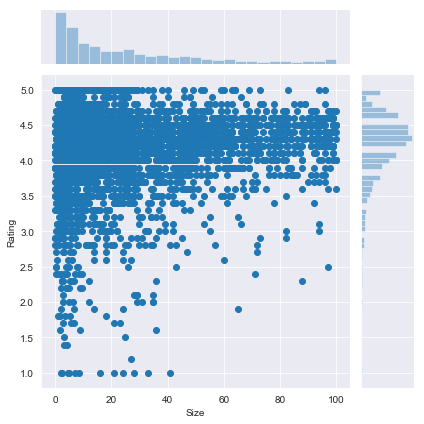

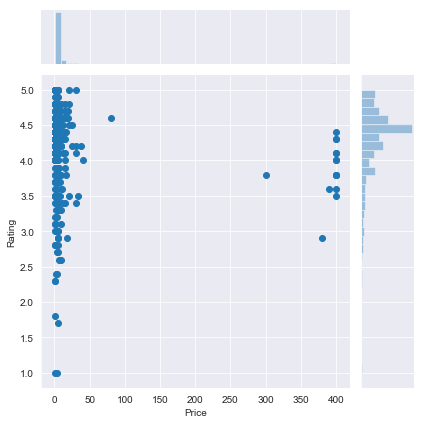

In [33]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

#Seleccionar filas donde el Rating y el tama√±o est√©n presente (Que su valor no sea null)
apps_with_size_and_rating_present = apps.dropna(subset=['Size','Rating'])

#Vamos a tomar una muestra con las categor√≠as que tengan al menos 250 aplicaciones
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) > 250)

#Graficamos Tama√±o vs Rating
plt1 = sns.jointplot(x=large_categories['Size'], y=large_categories['Rating'])

#Seleccionar aplicaciones que su tipo sean pagas
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

#Graficamos Precio vs Rating
plt2 = sns.jointplot(x= paid_apps['Price'], y=paid_apps['Rating'])

# Relaci√≥n entre la categor√≠a de la app y el precio

¬øC√≥mo se supone que las empresas y los desarrolladores lleguen a fin de mes? ¬øQu√© estrategias de monetizaci√≥n pueden utilizar las empresas para maximizar las ganancias? Los costos de las aplicaciones se basan en gran medida en las caracter√≠sticas, la complejidad y la plataforma.

Hay muchos factores a considerar al seleccionar la estrategia de precios adecuada para la aplicaci√≥n m√≥vil. Es importante considerar si el cliente est√° dispuesto a pagar por la aplicaci√≥n. Un precio incorrecto podr√≠a desmotivar al cliente y cancelar la compra antes de que ocurra la descarga. Los clientes potenciales pueden desanimarse por lo que perciben como un costo impactante, o tambi√©n pueden eliminar una aplicaci√≥n que han descargado despu√©s de recibir demasiados anuncios o simplemente no ver reflejado el valor de su dinero

Las diferentes categor√≠as exigen diferentes rangos de precios. Algunas aplicaciones que son simples y se usan a diario, como la calculadora, aplicaciones de este tipo, probablemente deben mantenerse gratuitas. Sin embargo, tendr√≠a sentido cobrar por una aplicaci√≥n m√©dica altamente especializada que diagnostica a pacientes diab√©ticos. En seguida vamos a ver que las aplicaciones m√©dicas y familiares son las m√°s caras. Algunas aplicaciones m√©dicas llegan a costar hasta $ 80, mientras que casi todas las aplicaciones de juegos tienen un precio razonable por debajo de $ 20.

Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         üíé I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.99
8780  LIFESTYLE  I'm Rich/Eu sou Rico/ÿ£ŸÜÿß ÿ∫ŸÜŸä/ÊàëÂæàÊúâÈå¢  399.99

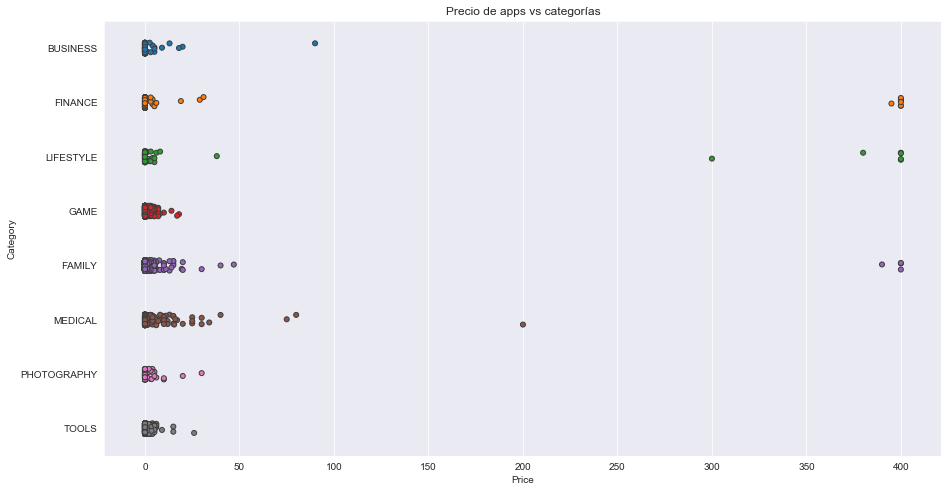

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

#Vamos a seleccionar solo algunas categor√≠as

popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

#Examinemos el precio de la app graficando Precio vs Categor√≠a
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('Precio de apps vs categor√≠as')

# Apps cuyo precio es mayor a $200
apps_above_200 = apps[apps['Price']>200]
apps_above_200[['Category', 'App', 'Price']]

# Filtremos las aplicaciones basura

Parece que hay mucha informaci√≥n, para solo haber filtrado unas cuantas categor√≠as, no? Hay muchas aplicaciones que son basura, significa que no tienen prop√≥sito, muchas veces desarrolladores crean aplicaciones como "I am Rich Premium"  o "Most Expensive App Ever" como broma o para efectuar tests en sus aplicaciones 

Vamos a quitar estas aplicaciones y volver a hacer nuestra gr√°fica

Text(0.5, 1.0, 'Precio de todas las apps vs categor√≠as, sin informaci√≥n basura')

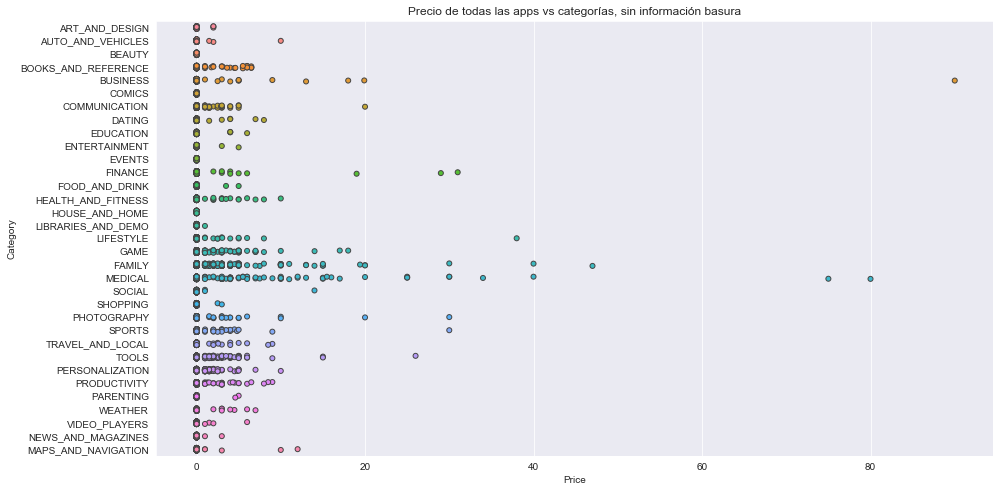

In [36]:
# Aplicaciones por debajo de $100
apps_under_100 = apps[apps['Price'] <= 100]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Vamos a examinar ahora precio vs categor√≠a con las apps que cuestan menos de $100
ax = sns.stripplot(x = apps_under_100['Price'], y = apps_under_100['Category'], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('Precio de todas las apps vs categor√≠as, sin informaci√≥n basura')

# Popularidad de aplicaciones pagas vs gratis

Para las aplicaciones de la Google Play Store, existen cinco tipos de estrategias de precios: gratis, freemium, de pago, paymium y suscripci√≥n. Pero vamos a enfocarnos en las aplicaciones pagas y gratis

Caracter√≠sticas de las aplicaciones gr√°tis:

<li>Son de descarga gratis</li>
<li>A veces son creadas por empresas que tienen otros productos, y esas apps terminan siendo extensiones de estos</li>
<li>Su principal fuente de ingresos, suele ser publicidad</li>

Caracter√≠sticas de las aplicaciones pagas:

<li>Los usuarios suelen pagar una vez, y usan para siempre</li>
<li>El usuario no puede tener una completa visi√≥n de la aplicaci√≥n sin comprarla, solo una muestra gratis</li>

Las aplicaciones pagas son tan descargadas como las gratis? 

In [38]:
trace0 = go.Box(
    # Data para aplicaciones pagas
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data para aplicaciones gr√°tis
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Numero de descargas: Apps gratis vs Apps Pagas",
    yaxis = dict(title = "N√∫mero de descargas",
                type = 'log',
                autorange = True)
)

# A√±adimos trace0 (pagas) y trace1 (gratis) para graficar
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

# An√°lisis de sentimientos de los usuarios

La extracci√≥n de datos de rese√±as de usuarios para determinar c√≥mo se sienten las personas acerca de su producto, marca o servicio se puede realizar mediante una t√©cnica llamada an√°lisis de sentimientos. Las rese√±as de los usuarios de las aplicaciones se pueden analizar para identificar si el estado de √°nimo es positivo, negativo o neutral con respecto a esa aplicaci√≥n. Por ejemplo, las palabras positivas en la rese√±a de una aplicaci√≥n pueden incluir palabras como "asombroso", "amigable", "bueno", "excelente" y "amo". Las palabras negativas pueden ser palabras como "malware", "odio", "problema", "reembolso" e "incompetente".

Al graficar los puntajes de polaridad de sentimiento de las opiniones de los usuarios para aplicaciones pagas y gratuitas, observamos que las aplicaciones gratuitas reciben muchos comentarios negativos, como lo indican los valores at√≠picos en el eje y negativo. Las rese√±as de aplicaciones pagas nunca parecen ser muy negativas. Esto puede indicar algo sobre la calidad de la aplicaci√≥n, es decir, que las aplicaciones pagas son de mayor calidad que las aplicaciones gratuitas en promedio.

                     App                                             Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
   Unnamed: 0                  App        Category  Rating  Reviews  Size  \
0           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
1           1  Coloring

Text(0.5, 1.0, 'Distribuci√≥n de la polaridad sentimental')

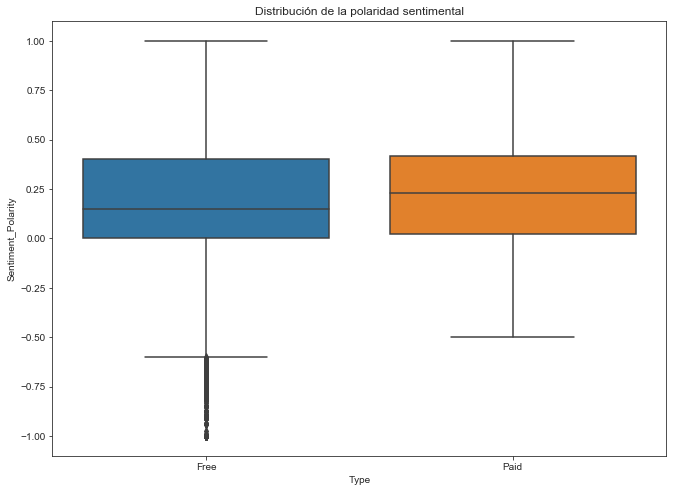

In [39]:
# Vamos a cargar el dataset user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')
print(reviews_df.head())

# Juntamos los dos datasets, apps y reviews_df
merged_df = pd.merge(apps,reviews_df)

# Borramos los valores nulos (NA) de las columnas Sentiment y Review
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

print(merged_df.head())

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# Polaridad de opini√≥n entre los usuarios de aplicaciones pagas y gratuitas
ax = sns.boxplot(x = merged_df['Type'], y = merged_df['Sentiment_Polarity'], data = merged_df)
ax.set_title('Distribuci√≥n de la polaridad sentimental')